In [ ]:
# The aim is to determine the type of Eryhemato-Squamous Disease.

In [4]:
# importing required libraried
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [6]:
# importing sklearn classification models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
# renaming columns
names = ["erythema" , "scaling", "definite_borders", "itching", "koebner_phenomenon", "polygonal_papules", "follicular_papules", "oral_mucosal_involvement", "knee and elbow involvement", "scalp_involvement", "family_history",
"melanin_incontinence","eosinophils_in_the_infiltrate", "PNL_infiltrate", "fibrosis_of_the_papillary_dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing_of_the_rete_ridges", "elongation_of_the_rete_ridges", "thinning_of_the_suprapapillary_epidermis", "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis", "disappearance_of_the_granular_layer", "vacuolisation_and_damage_of_basal_layer", "spongiosis", "saw-tooth_appearance_of_retes", "follicular_horn_plug", "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate", "band-like_infiltrate", "Age", "Disease"]

In [7]:
# Loading dermatology dataset, download from UCI
dataset = pd.read_csv('dermatology3.csv')

In [8]:
dataset.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee and elbow involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Disease
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [9]:
dataset.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee and elbow involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


In [2]:
#dataset.dtypes

In [5]:
dataset['Age'].dtypes

dtype('O')

In [6]:
dataset.isin(["?"]).sum(axis=0)

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee and elbow involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [7]:
#  class distrubution of the target column
#dataset.groupby('Disease').size()

In [1]:
#dataset.corr()

In [13]:
dataset['Age'].isin(["?"]).sum(axis=0)

8

In [61]:
import numpy as np

In [115]:
dataset.isna().sum()

erythema                                      0
scaling                                       0
definite_borders                              0
itching                                       0
koebner_phenomenon                            0
polygonal_papules                             0
follicular_papules                            0
oral_mucosal_involvement                      0
knee and elbow involvement                    0
scalp_involvement                             0
family_history                                0
melanin_incontinence                          0
eosinophils_in_the_infiltrate                 0
PNL_infiltrate                                0
fibrosis_of_the_papillary_dermis              0
exocytosis                                    0
acanthosis                                    0
hyperkeratosis                                0
parakeratosis                                 0
clubbing_of_the_rete_ridges                   0
elongation_of_the_rete_ridges           

In [14]:
# code will replace the special character to nan and then drop the columns 
dataset['Age'] = dataset['Age'].replace('?',np.nan)

In [15]:
dataset['Age'].isna().sum()

8

In [18]:
dataset.isna().any()

erythema                                    False
scaling                                     False
definite_borders                            False
itching                                     False
koebner_phenomenon                          False
polygonal_papules                           False
follicular_papules                          False
oral_mucosal_involvement                    False
knee and elbow involvement                  False
scalp_involvement                           False
family_history                              False
melanin_incontinence                        False
eosinophils_in_the_infiltrate               False
PNL_infiltrate                              False
fibrosis_of_the_papillary_dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing_of_the_rete_ridges                 False


In [43]:
dataset.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee and elbow involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [19]:
#dataset["Age"].fillna( method ='ffill', inplace = True)
dataset['Age']=dataset['Age'].fillna(dataset['Age'].median())

In [21]:
dataset['Age'].isna().sum()

0

In [22]:
dataset.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee and elbow involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [49]:
dataset.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee and elbow involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [107]:
dataset.isna().any()

erythema                                    False
scaling                                     False
definite_borders                            False
itching                                     False
koebner_phenomenon                          False
polygonal_papules                           False
follicular_papules                          False
oral_mucosal_involvement                    False
knee and elbow involvement                  False
scalp_involvement                           False
family_history                              False
melanin_incontinence                        False
eosinophils_in_the_infiltrate               False
PNL_infiltrate                              False
fibrosis_of_the_papillary_dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing_of_the_rete_ridges                 False


In [27]:
dataset['Age'].dtypes

dtype('O')

In [28]:
dataset['Age'] = dataset['Age'].astype(np.int64)

In [29]:
dataset['Age'].dtypes

dtype('int64')

In [30]:
dataset.to_csv('dermatology3.csv', index=False)

In [31]:
df = pd.read_csv('dermatology3.csv')
df.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee and elbow involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


In [87]:
dataset['Disease'] = dataset['Disease'].astype(np.int64)

In [88]:
dataset.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee and elbow involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [158]:
# split dataset into train , test and validation sets

array = dataset.values
X = array[:, 0:-1] # all rows taken, all columns except last one
Y = array[:, -1] # all rows takne, only last column taken
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=7, shuffle=True)
##############################
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)
#print(x_train[:5])
#print(x_train_sc[:5])
################################


# Y = array
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7) # 20 percent test dataset

In [12]:
# K Neighbors classifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_sc,y_train)
y_pred=clf.predict(x_test_sc)
#print(y_pred)

In [14]:
clf.score(x_test_sc, y_test)

0.9452054794520548

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred))

[[21  0  0  0  0  0]
 [ 0 12  0  3  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0 11  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.92      0.80      0.86        15
           3       1.00      1.00      1.00        13
           4       0.79      0.92      0.85        12
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         2

    accuracy                           0.95        73
   macro avg       0.95      0.95      0.95        73
weighted avg       0.95      0.95      0.95        73

Accuracy score 0.95


In [59]:
from sklearn.svm import  SVC
svm=SVC(kernel='linear',C=1,random_state=0)
svm.fit(x_train_sc,y_train)
y_pred=svm.predict(x_test_sc)
#print(y_pred)
print(svm.score(x_test_sc, y_test))
print('misclassified samples:%d'%(y_test!=y_pred).sum())

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

0.9452054794520548
misclassified samples:4


misclassified samples:1


[[21  0  0  0  0  0]
 [ 0 14  0  1  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        13
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         2

    accuracy                           0.99        73
   macro avg       0.99      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73

Accuracy:0.99


In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train_sc,y_train)
dtc.score(x_test_sc,y_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

[[21  0  0  0  0  0]
 [ 0 14  0  1  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        13
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         2

    accuracy                           0.99        73
   macro avg       0.99      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73

Accuracy:0.99


In [45]:
print('misclassified samples:%d'%(y_test!=y_pred).sum())

misclassified samples:1


In [46]:
dataset.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee and elbow involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Disease
erythema,1.000000,0.435607,0.260654,-0.047353,0.000498,0.033449,-0.109647,-0.026946,0.141151,0.186609,...,0.159014,0.002425,0.023084,-0.005915,-0.005515,0.009474,0.075570,-0.007099,-0.003382,-0.335800
scaling,0.435607,1.000000,0.360846,-0.085602,-0.010024,-0.074691,-0.092188,-0.082639,0.298182,0.302209,...,0.212024,-0.109187,0.010748,-0.114134,-0.010335,-0.010949,-0.010041,-0.131738,0.016329,-0.468502
definite_borders,0.260654,0.360846,1.000000,-0.056217,0.239187,0.326968,-0.168728,0.285790,0.305436,0.267366,...,0.353809,0.297138,-0.249164,0.273529,-0.087689,-0.125562,0.106925,0.281452,0.144544,-0.396057
itching,-0.047353,-0.085602,-0.056217,1.000000,0.271582,0.412835,-0.144099,0.362073,-0.302110,-0.153884,...,-0.191183,0.370701,0.010451,0.379251,-0.175467,-0.183683,0.067809,0.389908,0.041879,0.056936
koebner_phenomenon,0.000498,-0.010024,0.239187,0.271582,1.000000,0.393592,-0.173438,0.392060,-0.065678,0.014118,...,0.003301,0.375926,-0.002478,0.381149,-0.148507,-0.164937,0.081283,0.382270,0.083200,-0.092382
polygonal_papules,0.033449,-0.074691,0.326968,0.412835,0.393592,1.000000,-0.137526,0.865064,-0.275696,-0.254163,...,-0.120473,0.911572,0.082789,0.895043,-0.095809,-0.110547,0.227406,0.905763,0.097759,0.057176
follicular_papules,-0.109647,-0.092188,-0.168728,-0.144099,-0.173438,-0.137526,1.000000,-0.132810,0.222643,-0.003997,...,-0.157808,-0.140404,-0.012057,-0.139582,0.785247,0.844903,-0.085999,-0.134335,-0.370265,0.477632
oral_mucosal_involvement,-0.026946,-0.082639,0.285790,0.362073,0.392060,0.865064,-0.132810,1.000000,-0.283119,-0.260716,...,-0.107444,0.887487,0.123183,0.875136,-0.082916,-0.106756,0.250015,0.892277,0.112329,0.055215
knee and elbow involvement,0.141151,0.298182,0.305436,-0.302110,-0.065678,-0.275696,0.222643,-0.283119,1.000000,0.660260,...,0.482614,-0.281784,-0.417120,-0.280029,0.233218,0.257988,-0.067483,-0.276325,-0.078791,-0.382977
scalp_involvement,0.186609,0.302209,0.267366,-0.153884,0.014118,-0.254163,-0.003997,-0.260716,0.660260,1.000000,...,0.488372,-0.253429,-0.419951,-0.258154,-0.052285,-0.017731,0.033354,-0.250965,0.039395,-0.534427


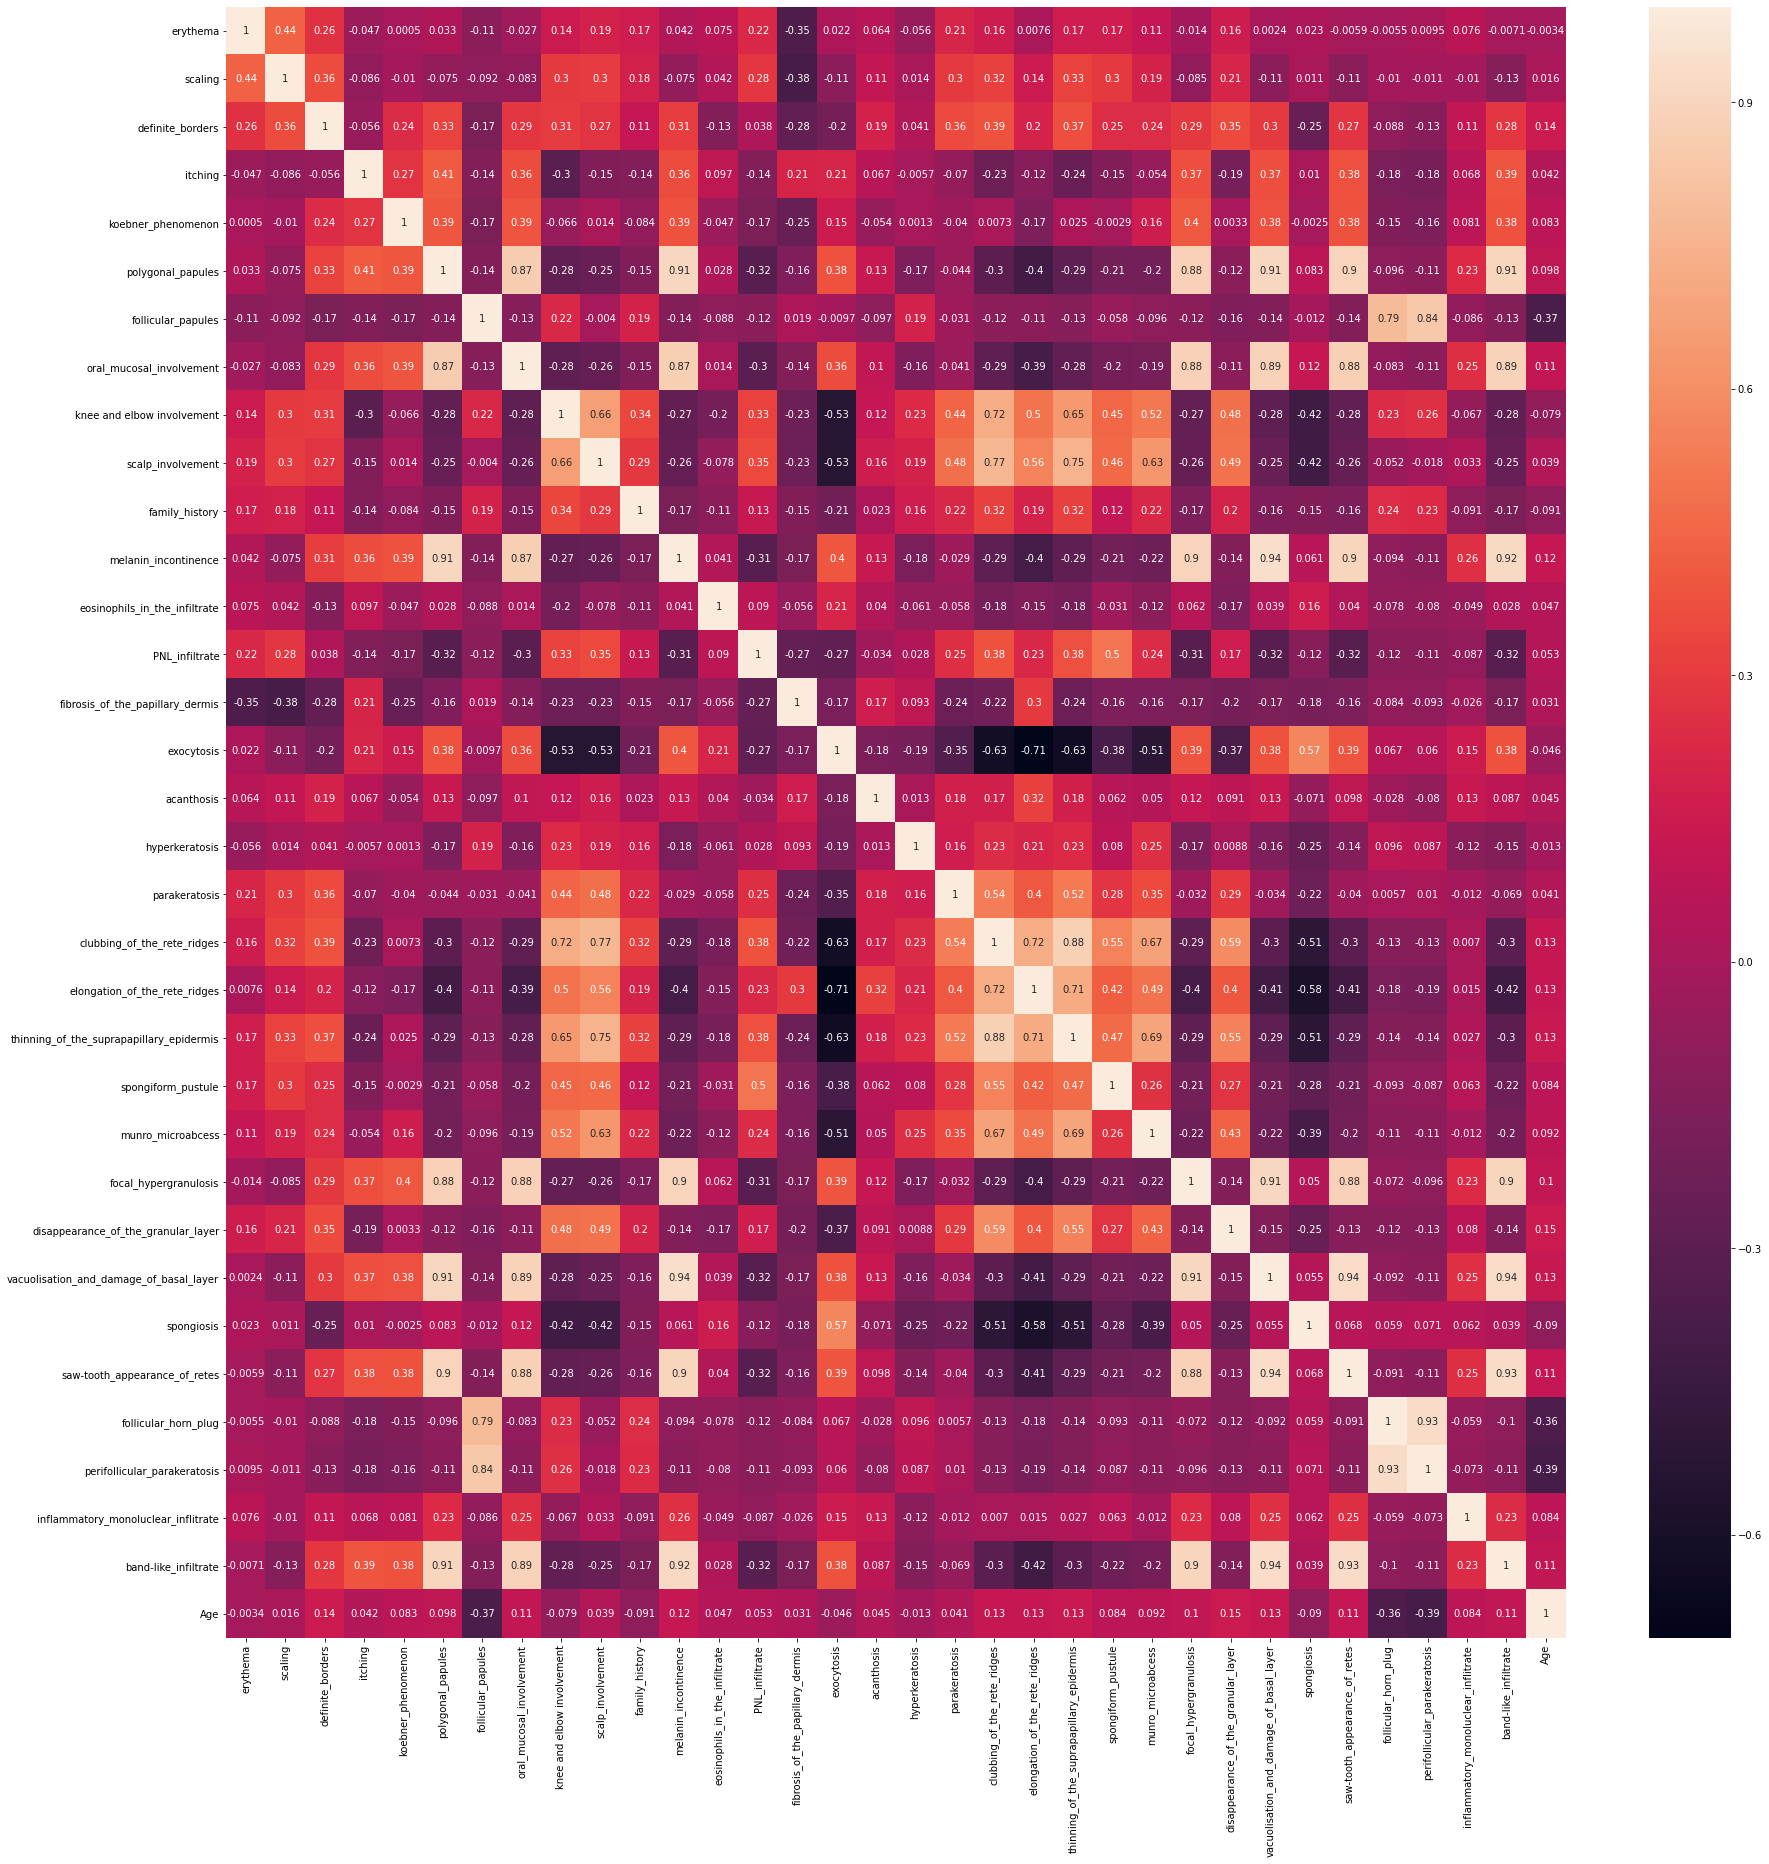

In [18]:
corr = dataset.iloc[:, :-1].corr() # except last target column
top_features = corr.index
plt.figure(figsize=(30,30))
sns.heatmap(dataset[top_features].corr(), annot=True)

In [23]:
# remove the highly correlated attributes except target
# both these attributes are doing same work
# so we can neglect one of them

# finding and remove correlated attributes

def correlation(df, threshold):
    corr_col = set() # unique columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # checking absolute coeff difference
                col_name = corr_matrix.columns[i] # getting the name of colummnd
                corr_col.add(col_name)


    return corr_col



In [128]:
threshold = 0.9 # drop atrribute > 0.6

df = dataset.iloc[:, :-1]
correlated_features = correlation(df, threshold) # correlated columns

print(len(correlated_features))
print(correlated_features)


5
{'melanin_incontinence', 'perifollicular_parakeratosis', 'saw-tooth_appearance_of_retes', 'band-like_infiltrate', 'vacuolisation_and_damage_of_basal_layer'}


In [130]:
newCols= list(correlated_features)
newCols =newCols[1:]

newDataset = dataset.copy()
#newDataset.shape
newDataset.drop(columns=newCols, inplace=True)
newDataset.shape

(365, 31)

In [131]:
array = newDataset.values
X = array[:, 0:-1] # all rows taken, all columns except last one
Y = array[:, -1] # all rows takne, only last column taken
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=7)
##############################
'''
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

'''
# K Neighbors classifier



'\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nsc.fit(x_train)\nx_train_sc=sc.transform(x_train)\nx_test_sc=sc.transform(x_test)\n\n'

In [160]:
# K Neighbors Classifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
print(accuracy_score(y_pred, y_test))
print(clf.score(x_test,y_test))
print('misclassified samples:%d'%(y_test!=y_pred).sum())

0.9863013698630136
0.863013698630137
misclassified samples:1


In [161]:
# SVM MODEL
svm=SVC(kernel='linear',C=1,random_state=0)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
#print(y_pred)
print(accuracy_score(y_pred, y_test))
print(svm.score(x_test,y_test))
print('misclassified samples:%d'%(y_test!=y_pred).sum())

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

0.9863013698630136
0.9863013698630136
misclassified samples:1


In [162]:
# Tree Classifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)
print(accuracy_score(y_pred, y_test))
print(dtc.score(x_test,y_test))
print('misclassified samples:%d'%(y_test!=y_pred).sum())
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))


0.9863013698630136
0.958904109589041
misclassified samples:1


(365, 25)

In [102]:
y_test

# loading model from disk to compare results




array([6, 3, 5, 1, 1, 3, 2, 1, 3, 5, 4, 4, 2, 5, 1, 5, 4, 2, 1, 1, 2, 6,
       2, 5, 4, 2, 3, 1, 3, 1, 4, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 3, 2,
       4, 5, 3, 5, 4, 1, 3, 1, 5, 2, 4, 1, 2, 5, 4, 2, 4, 1, 4, 2, 1, 2,
       1, 1, 2, 1, 5, 4, 3], dtype=int64)

In [96]:
traintestDf = pd.DataFrame({'x_train':x_train, 'x_test':x_test, 'y_train':y_train,'y_test':y_test, 'x_train_sc':x_train_sc, 'x_test_sc':x_test_sc})
traintestDf.to_csv('traintest.csv', index=False)

In [95]:
traintestDf.shape

(73, 1)

In [108]:
traintest = pd.read_csv('traintest.csv')
traintest=traintest['x_test'].values

In [109]:
y_test2

array([6, 3, 5, 1, 1, 3, 2, 1, 3, 5, 4, 4, 2, 5, 1, 5, 4, 2, 1, 1, 2, 6,
       2, 5, 4, 2, 3, 1, 3, 1, 4, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 3, 2,
       4, 5, 3, 5, 4, 1, 3, 1, 5, 2, 4, 1, 2, 5, 4, 2, 4, 1, 4, 2, 1, 2,
       1, 1, 2, 1, 5, 4, 3], dtype=int64)

In [150]:
import pickle
pickle.dump(dtc, open('dtc.pkl', 'wb'))




In [152]:
# loading model from disk to compare results

model= pickle.load(open('dtc.pkl', 'rb'))




1

In [155]:
dataset.iloc[-1,-1]

1

In [156]:
pred_data= dataset.iloc[-1,:-1].values
y_predicted=model.predict([pred_data])
print('Disease ',y_predicted[0])

Disease  1


(34,)